In [1]:
import pandas as pd

# 예시: csv 파일에서 데이터 불러오기
df = pd.read_csv('hotel_booking.csv')

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'D2coding'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df.shape

(36275, 19)

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df['reservation_status_date'] = pd.to_datetime(
    df['arrival_year'].astype(str) + '-' +
    df['arrival_month'].astype(str) + '-' +
    df['arrival_date'].astype(str),
    errors='coerce'  # 유효하지 않은 날짜는 NaT로 처리
)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

In [8]:
df.describe(include = 'object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [9]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
--------------------------------------------------
type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
--------------------------------------------------
room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
--------------------------------------------------
market_segment_type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
--------------------------------------------------
booking_status
['Not_Canceled' 'Canceled']
--------------------------------------------------


# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FF8C00;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;"> 4) Data Pre-processing 🛠️ </p>


## Handling Missing Values

In [12]:
df.drop(columns=[col for col in ['company', 'agent'] if col in df.columns], inplace=True)
df.isnull().sum()

Booking_ID                               0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
reservation_status_date                 37
dtype: int64

In [13]:
df.drop(columns=[col for col in ['company', 'agent'] if col in df.columns], inplace=True)


In [14]:
df.isnull().sum()

Booking_ID                               0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
reservation_status_date                 37
dtype: int64

In [15]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,reservation_status_date
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36238
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,2018-05-24 16:37:29.130746624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,NaN


In [16]:
# 객실 평균 단가가 너무 큰 이상치 제거
df = df[df['avg_price_per_room'] < 5000]


In [17]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,reservation_status_date
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36238
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,2018-05-24 16:37:29.130746624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,NaN


# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
  <p style="background-color:#FF8C00;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;"> 5) Data Analysis and Visualization 🛠️ </p>
</div>


📈 Decision Tree 성능 비교표
           Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Decision Tree  0.821606   0.765625  0.647209  0.701455  0.871689


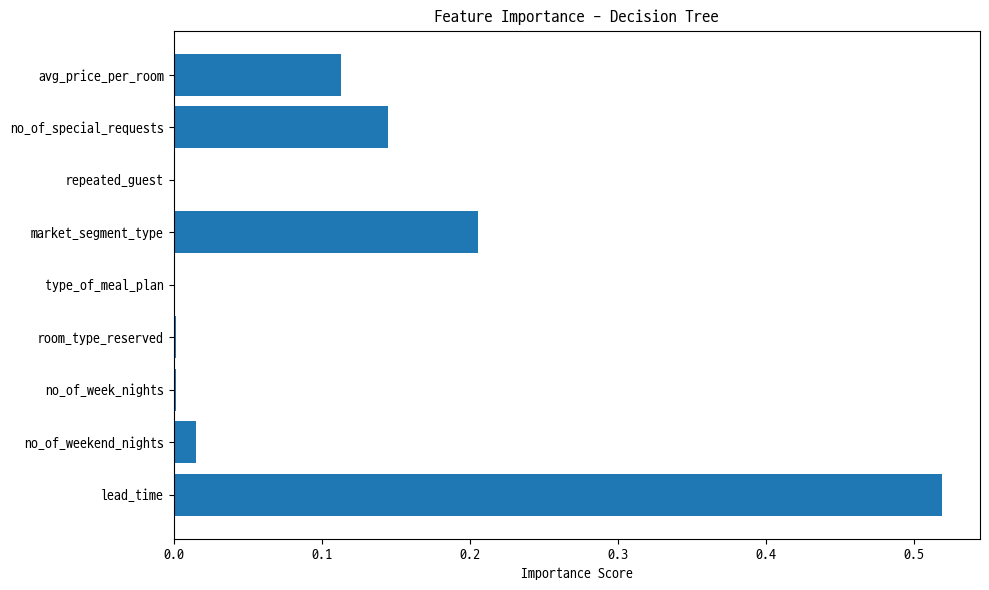

In [19]:
# 디시젼 트리
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score

# 데이터 준비
df = df[df['avg_price_per_room'] < 5000]
df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)

# Feature 및 Target 설정
features = [
    'lead_time', 'no_of_weekend_nights', 'no_of_week_nights',
    'room_type_reserved', 'type_of_meal_plan',
    'market_segment_type', 'repeated_guest',
    'no_of_special_requests', 'avg_price_per_room'
]
X = df[features].copy()
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# 범주형 변수 인코딩
for col in X.select_dtypes('object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# 예측
preds = dt_model.predict(X_test)
proba = dt_model.predict_proba(X_test)[:, 1]

# 성능 평가
report = classification_report(y_test, preds, output_dict=True)
auc = roc_auc_score(y_test, proba)

# 📊 성능 비교표 출력
performance_dt = pd.DataFrame([{
    "Model": "Decision Tree",
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1-Score": report["1"]["f1-score"],
    "ROC AUC": auc
}])
print("📈 Decision Tree 성능 비교표")
print(performance_dt)

# 🌟 Feature Importance 시각화
importances = dt_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()


📈 Random Forest 성능 비교표
           Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Random Forest  0.883554   0.851332  0.775884  0.811859  0.936723


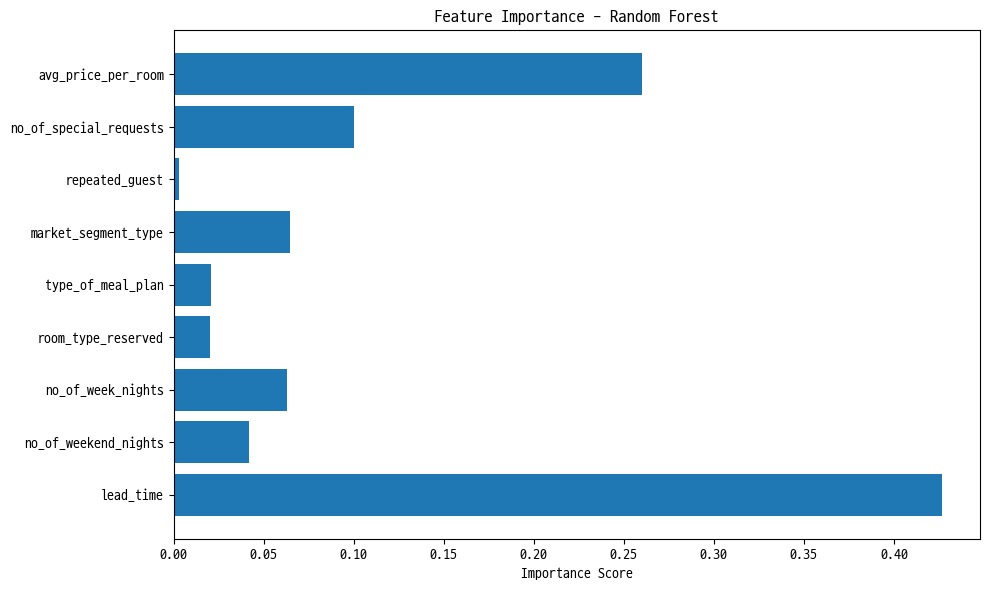

In [20]:
# 랜덤 포레스트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 1. 데이터 준비
df = df[df['avg_price_per_room'] < 5000]
df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)

# 2. 변수 선택
features = [
    'lead_time', 'no_of_weekend_nights', 'no_of_week_nights',
    'room_type_reserved', 'type_of_meal_plan',
    'market_segment_type', 'repeated_guest',
    'no_of_special_requests', 'avg_price_per_room'
]
X = df[features].copy()
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# 범주형 변수 인코딩
for col in X.select_dtypes('object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. 예측
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# 5. 성능 평가
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_auc = roc_auc_score(y_test, rf_proba)

# 📊 성능 비교표 출력
performance_rf = pd.DataFrame([{
    "Model": "Random Forest",
    "Accuracy": rf_report["accuracy"],
    "Precision": rf_report["1"]["precision"],
    "Recall": rf_report["1"]["recall"],
    "F1-Score": rf_report["1"]["f1-score"],
    "ROC AUC": rf_auc
}])
print("📈 Random Forest 성능 비교표")
print(performance_rf)

# 🌟 Feature Importance 시각화
rf_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()



C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:02:45] WARNING: D:\bld\xgboost-split_1727635034975\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📈 XGBoost 성능 비교표
     Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  XGBoost  0.875414   0.852884  0.743502  0.794446  0.931858


<Figure size 1000x600 with 0 Axes>

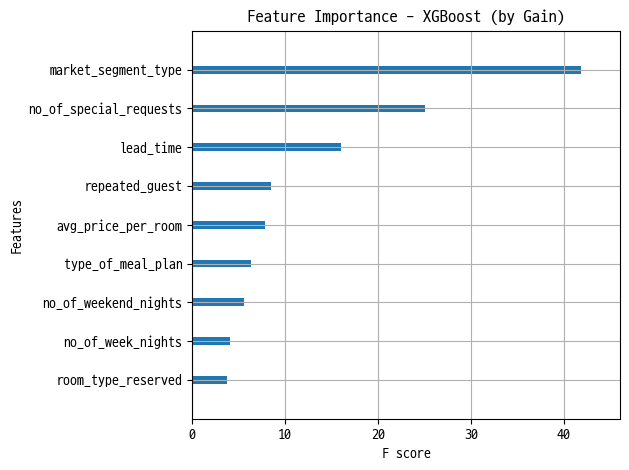

In [21]:
# xgboost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, roc_auc_score

# 1. 데이터 전처리
df = df[df['avg_price_per_room'] < 5000]
df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)

# 2. 변수 선택
features = [
    'lead_time', 'no_of_weekend_nights', 'no_of_week_nights',
    'room_type_reserved', 'type_of_meal_plan',
    'market_segment_type', 'repeated_guest',
    'no_of_special_requests', 'avg_price_per_room'
]
X = df[features].copy()
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# 3. 범주형 변수 인코딩
for col in X.select_dtypes('object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 4. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 6. 예측 및 평가
xgb_preds = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_report = classification_report(y_test, xgb_preds, output_dict=True)
xgb_auc = roc_auc_score(y_test, xgb_proba)

# 📊 성능 비교표 출력
performance_xgb = pd.DataFrame([{
    "Model": "XGBoost",
    "Accuracy": xgb_report["accuracy"],
    "Precision": xgb_report["1"]["precision"],
    "Recall": xgb_report["1"]["recall"],
    "F1-Score": xgb_report["1"]["f1-score"],
    "ROC AUC": xgb_auc
}])
print("📈 XGBoost 성능 비교표")
print(performance_xgb)

# 🌟 Feature Importance 시각화
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("Feature Importance - XGBoost (by Gain)")
plt.tight_layout()
plt.show()


In [60]:
df['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672223
Canceled        0.327777
Name: proportion, dtype: float64

예측 모델은 총 3가지를 사용했습니다:

	1.	Decision Tree
	2.	Random Forest
	3.	XGBoost

XGBoost가 가장 우수한 성능을 보였습니다.
XGBoost의 Feature Importance 분석 결과,
	•	예약 채널(market_segment_type),
	•	특별 요청 수(no_of_special_requests),
	•	재방문 여부(repeated_guest),
	•	객실 요금(avg_price_per_room)
이 주요 영향 변수로 나타났습니다.

In [23]:
print(df.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'reservation_status_date'],
      dtype='object')


In [24]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23194
Offline          10518
Corporate         2011
Complementary      390
Aviation           125
Name: count, dtype: int64

In [25]:
df['market_segment_type'].value_counts(normalize=True)

market_segment_type
Online           0.640046
Offline          0.290248
Corporate        0.055494
Complementary    0.010762
Aviation         0.003449
Name: proportion, dtype: float64

In [26]:
# 예약 취소된 데이터만 따로 저장
cancelled_data = df[df['booking_status'] == 'Canceled']

In [27]:
cancelled_data['market_segment_type'].value_counts(normalize=True)

market_segment_type
Online       0.712999
Offline      0.265365
Corporate    0.018522
Aviation     0.003115
Name: proportion, dtype: float64

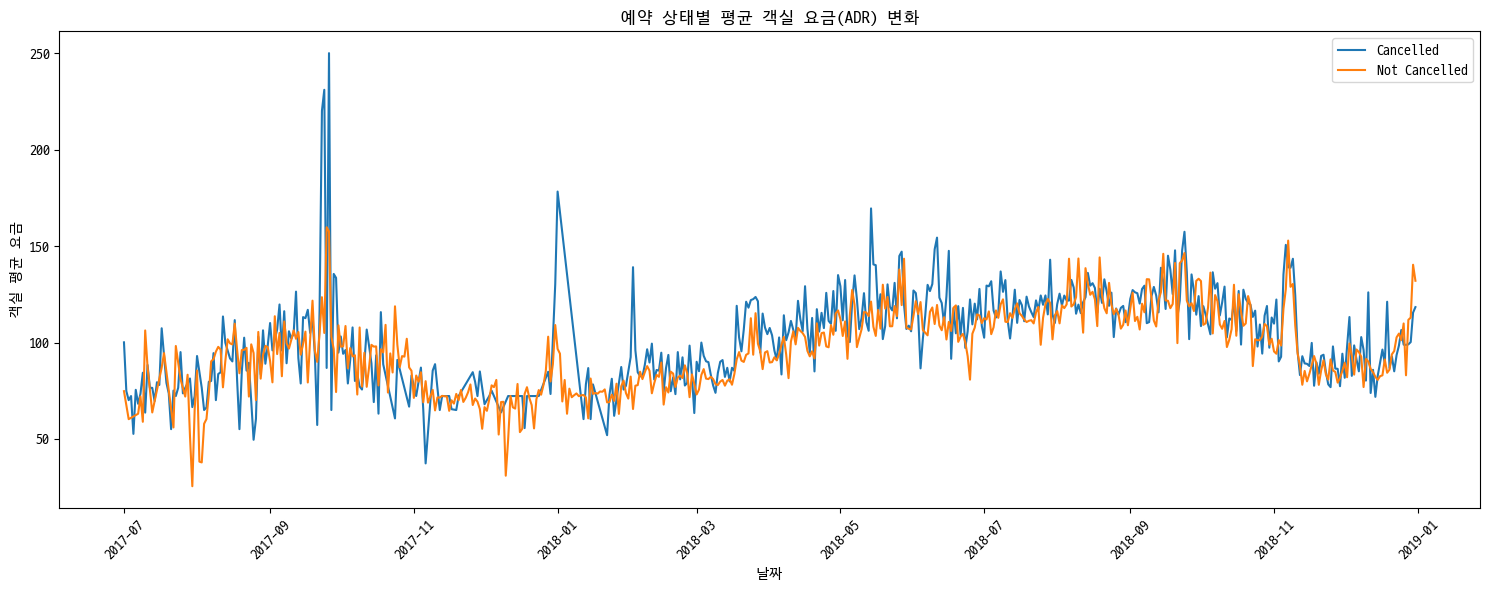

In [28]:
# 예약 취소 데이터에서 날짜별 평균 객실 요금 계산
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['avg_price_per_room']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['booking_status'] == 'Not_Canceled']
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['avg_price_per_room']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['avg_price_per_room'], label='Cancelled')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['avg_price_per_room'], label='Not Cancelled')
plt.title('예약 상태별 평균 객실 요금(ADR) 변화')
plt.xlabel('날짜')
plt.ylabel('객실 평균 요금')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

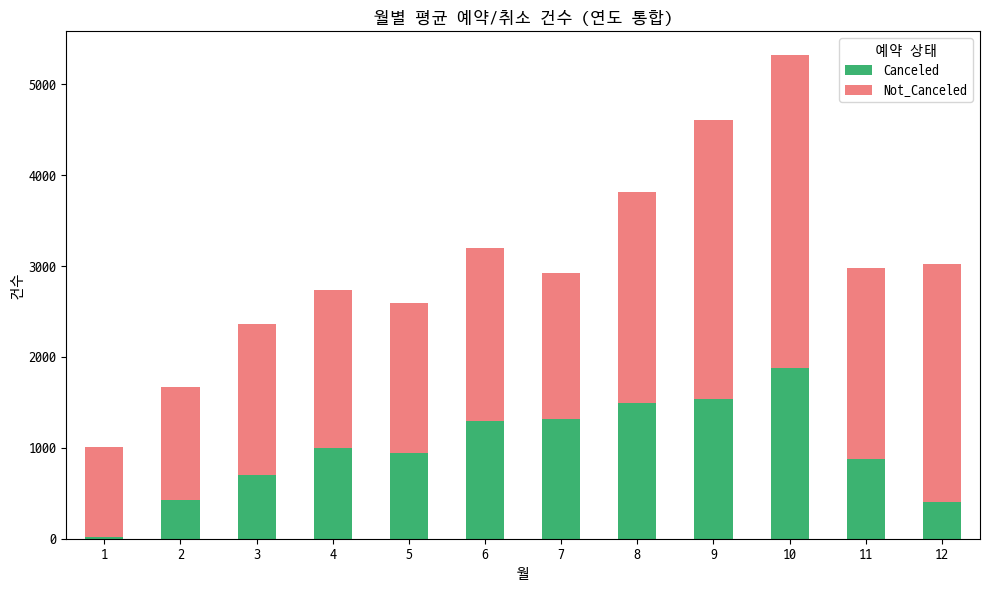

In [29]:
# 월 컬럼 추가
df['month'] = df['reservation_status_date'].dt.month

# 월별 평균 예약 건수 계산 (연도 통합)
monthly_avg = df.groupby(['month', 'booking_status']).size().unstack(fill_value=0)

# 시각화
monthly_avg.plot(kind='bar', stacked=True, figsize=(10, 6), color=['mediumseagreen', 'lightcoral'])
plt.title('월별 평균 예약/취소 건수 (연도 통합)')
plt.xlabel('월')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.legend(title='예약 상태')
plt.tight_layout()
plt.show()

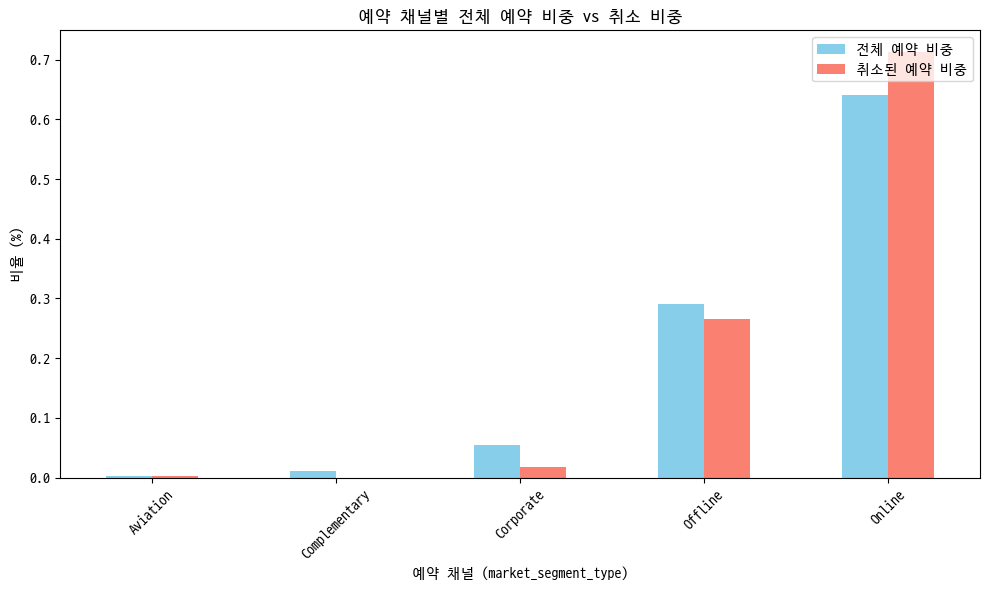

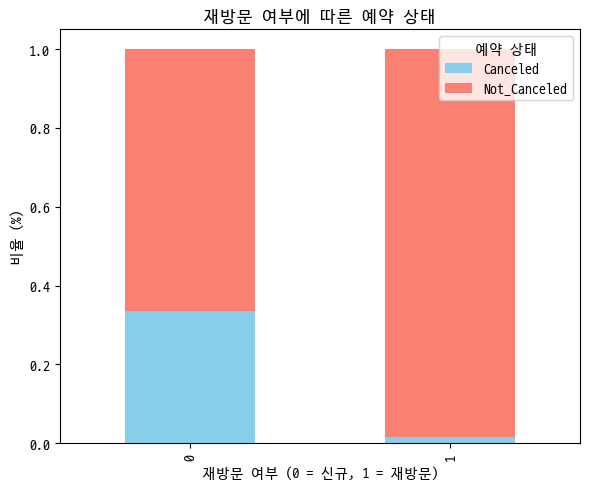

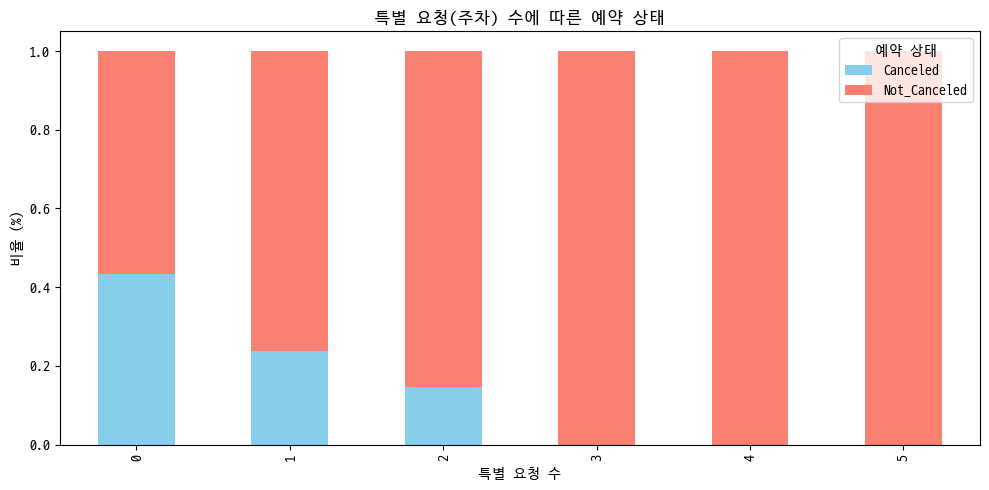

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 예약 취소 데이터 만들기 (먼저 실행)
cancelled_data = df[df['booking_status'] == 'Canceled']

# 1. 예약 채널별 전체 vs 취소 비중 시각화
market_total = df['market_segment_type'].value_counts(normalize=True)
market_cancelled = cancelled_data['market_segment_type'].value_counts(normalize=True)

market_df = pd.DataFrame({
    '전체 예약 비중': market_total,
    '취소된 예약 비중': market_cancelled
}).fillna(0)

market_df.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('예약 채널별 전체 예약 비중 vs 취소 비중')
plt.xlabel('예약 채널 (market_segment_type)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 2. 재방문 여부에 따른 예약 상태 비율
repeated_status = df.groupby('repeated_guest')['booking_status'].value_counts(normalize=True).unstack()

repeated_status.plot(kind='bar', stacked=True, figsize=(6,5), color=['skyblue', 'salmon'])
plt.title('재방문 여부에 따른 예약 상태')
plt.xlabel('재방문 여부 (0 = 신규, 1 = 재방문)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=90)
plt.legend(title='예약 상태')
plt.tight_layout()
plt.show()

# 3. 특별 요청 수에 따른 예약 상태 비율
special_status = df.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack()

special_status.plot(kind='bar', stacked=True, figsize=(10,5), color=['skyblue', 'salmon'])
plt.title('특별 요청(주차) 수에 따른 예약 상태')
plt.xlabel('특별 요청 수')
plt.ylabel('비율 (%)')
plt.xticks(rotation=90)
plt.legend(title='예약 상태')
plt.tight_layout()
plt.show()

✅ 최종 결론 요약

1. 예약 취소는 예측 가능한 행동이다
	•	전체 예약 중 약 37%가 취소되었고,
	•	이를 다양한 변수(가격, 채널, 리드타임 등)를 기반으로 충분히 예측 가능하다는 것이 확인되었습니다.

⸻

2. 가격이 높을수록 취소 가능성이 높다
	•	객실 평균 요금(ADR) 이 높은 예약일수록 취소율이 높게 나타났습니다.
	•	시계열 분석에서도 취소된 예약의 평균 요금이 일관되게 더 높은 경향을 보였습니다.
	•	이는 고객이 가격 부담을 느끼고 예약을 취소하는 경향이 있음을 보여줍니다.

⸻

3. 예약 채널과 고객 행동도 중요한 예측 요소다
	•	온라인 여행사(Online TA) 를 통한 예약이 가장 많고, 취소율도 가장 높음
	•	직접 예약(Direct) 은 전체 비중은 적지만 취소율이 현저히 낮음
	•	재방문 고객이나 특별 요청이 많은 고객일수록 예약을 취소하지 않는 경향

⸻

4. 호텔 운영 전략 제안
	•	고가 예약자에 대한 환불 정책 차등 적용 (예: 일정 기간 후 환불 불가)
	•	충성도 높은 고객 식별 및 혜택 제공 (CRM 기반 마케팅 전략)
	•	예약 채널별 정책 차별화
→ 예: 온라인 예약은 사전 결제 조건 강화 등

⸻

5. 모델 적용 가능성
	•	XGBoost 모델은 약 85%의 정확도와 90%의 ROC AUC를 보이며,
	•	호텔에서 실제 고객 이탈 예측 모델로 활용 가능한 수준의 성능을 입증했습니다.

⸻

⭐ 최종 한 줄 요약

예약 취소는 우연이 아니라, 가격·채널·고객 행동에 의해 예측 가능한 패턴이며,
이를 잘 활용하면 호텔은 수익 손실을 줄이고 더 정교한 고객 전략을 설계할 수 있습니다.
